<a href="https://colab.research.google.com/github/Joizra/Sentiment-Analysis/blob/main/Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Sentiment Analysis


### 1. Reading datasets

In [ ]:
# !pip install simplejson
# !pip install django
# !pip install pyarrow
# !pip install spacy

In [ ]:
# Get some libraries
import pandas as pd
import numpy as np
import nltk
import regex as re
import seaborn as sns
import json
import spacy
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

# Path to my JSON file
archive_path ='/content/drive/My Drive/Colab Notebooks/NLP/NLP_A1/random_30000_hotel_reviews.JSON'

# Get data from JSON file
df = pd.read_json(archive_path, lines=True)
df=pd.DataFrame(df)
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ratings            30000 non-null  object        
 1   title              30000 non-null  object        
 2   text               30000 non-null  object        
 3   author             30000 non-null  object        
 4   date_stayed        28806 non-null  object        
 5   offering_id        30000 non-null  int64         
 6   num_helpful_votes  30000 non-null  int64         
 7   date               30000 non-null  datetime64[ns]
 8   id                 30000 non-null  int64         
 9   via_mobile         30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 2.1+ MB


In [ ]:
#Explore dataset
df

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False
...,...,...,...,...,...,...,...,...,...,...
29995,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Felt right at home here”,I've stayed at many downtown Chicago hotels. T...,"{'username': 'eyemdphd', 'num_cities': 9, 'num...",April 2012,217498,3,2012-05-01,129203990,False
29996,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Days Inn Chicago 101212”,It is always a pleasant stay at your facility....,"{'username': 'ROBERT S', 'num_reviews': 1, 'id...",October 2012,87571,0,2012-10-22,143435143,False
29997,"{'service': 2.0, 'cleanliness': 3.0, 'overall'...",“Upgrades Needed”,We recently stayed here for a girls' weekend. ...,"{'username': 'Daisy M', 'num_reviews': 1, 'id'...",January 2012,223022,0,2012-01-30,123834976,False
29998,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“perfect bargain city hotel”,I made my reservation online at the Bijou beca...,"{'username': 'doublemet', 'num_reviews': 1, 'i...",May 2010,80920,1,2010-05-30,65827506,False


In [ ]:
#Drop columns that won't be used later
df.drop(columns=['author','date_stayed', 'offering_id','num_helpful_votes','date','id', 'via_mobile'], inplace=True)

In [ ]:
# Remove quotation marks from title
df['title'] = df['title'].str.replace('“', '')
df['title'] = df['title'].str.replace('”', '')

# Concatenate “title” field with “text” field.
df['title_text']=df['title']+'.'+' '+df['text']

In [ ]:
# Drop all non-alphanumeric characters from title_text field
df['title_text'] = df['title_text'].replace('[^a-zA-Z0-9]', ' ', regex=True)

In [ ]:
# Get the overall rating
df['overall_rating'] = df['ratings'].apply(lambda x: x.get('overall', None))

In [ ]:
# Check overall_rating levels
df['overall_rating'].value_counts()

5.0    12293
4.0     9653
3.0     4080
2.0     2031
1.0     1942
0.0        1
Name: overall_rating, dtype: int64

For this sentiment analysis task, we classify sentiments as positive (ratings of 4 and 5) and negative (ratings of 1, 2, and 3). Assign the corresponding labels to each sentiment category accordingly.

In [ ]:
# Get the sentiment from overall score (positive and negative)
def get_sentiment(x):
    if x > 3:
        return 1
    else:
        return 0
df['overall_rating'] = df['overall_rating'].apply(lambda x:get_sentiment(x))


In [ ]:
# keep only title_text field and overall_rating field
df.drop(columns=['ratings','title', 'text'], inplace=True)

In [ ]:
#Check dataset
df

,title_text,overall_rating
0,Horrible experience First of all we got there...,0
1,Stay Away Found Racist graffiti in the room ...,0
2,Great location and service Close to Union Squ...,1
3,I will never go back here again I had a bad ...,0
4,Ripped off our VISA card after departure Afte...,0
...,...,...
29995,Felt right at home here I ve stayed at many d...,1
29996,Days Inn Chicago 101212 It is always a pleasa...,1
29997,Upgrades Needed We recently stayed here for a...,0
29998,perfect bargain city hotel I made my reservat...,1


In [ ]:
# Tokenize title_text field
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['text_tokenize'] = df['title_text'].apply(lambda x:word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Split datset into: Training set (first 10000 lines) to be used for the final training/testing.
X_train=df.loc[ :9999, ['text_tokenize']]
y_train=df.loc[ :9999, ['overall_rating']]

In [ ]:
# Split datset into: Development set (next 10000 lines) to be used for for all experiments.
X_development=df.loc[10000:19999, ['text_tokenize']]
y_development=df.loc[10000:19999, ['overall_rating']]

In [ ]:
#Split datset into: Test set
X_test=df.loc[20000:, ['text_tokenize']]
y_test=df.loc[20000:, ['overall_rating']]

### 2. Exploratory Data Analysis (EDA)

#### Distribution of sentiments

This analyses helps to identify the imbalance among the levels of a category.

The class distribution is significantly imbalanced, with disparities exceeding 10% among the categories.

*   1-Positive:7291
*   0-Negative:2709




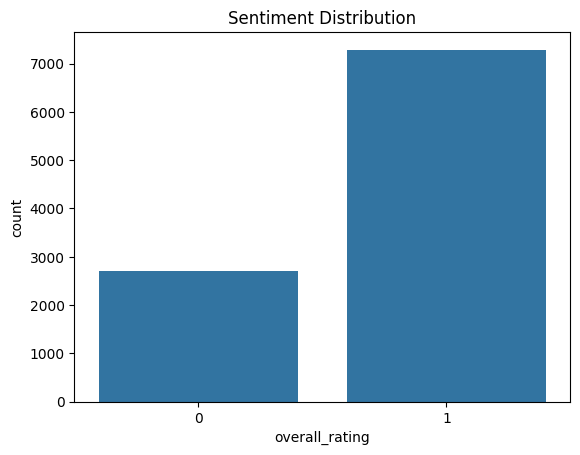

In [ ]:
# Analyse Distribution of sentiment
sns.countplot(x='overall_rating', data=y_development)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.show()

In [ ]:
y_development.value_counts()

overall_rating
1                 7291
0                 2709
dtype: int64

#### Distribution of text lengths

 This graph helps identify if there are any extremely short or long texts that might require special handling, such as truncation, summarization, or exclusion, to ensure the sentiment analysis model processes the data effectively.

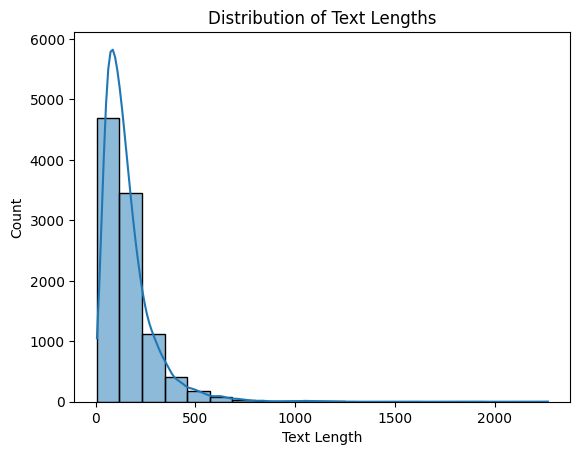

In [ ]:
# Analyze the distribution of text lengths
sns.histplot(X_development['text_tokenize'].apply(lambda x: len(x)), bins=20, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.show()


In [ ]:
count_no_text = (X_development['text_tokenize'].str.len() < 5).sum()
count_no_text

0

There are no need to exclude any observation

#### Unique words

This analysis involves identifying unique word.

In [ ]:
from collections import Counter
# Flatten the list of tokens and count the occurrences
tokens=X_development["text_tokenize"]
filtered_words = [token for sublist in tokens for token in sublist]
word_freq = Counter(filtered_words)
unique_elements = [element for element, count in word_freq.items() if count == 1]

# Get the number of unique elements
print(len(unique_elements))

# Get unique elements
print(unique_elements)


14496
['coaxing', 'Buzz', 'overrall', '8ft', 'overfacing', 'verytime', 'legitimately', 'aug', 'CONGRATULATIONS', 'Phili', 'Shoping', 'Glasgow', 'Definantly', 'HEY', 'FOOs', 'sleepnumber', 'vacancy', 'Ruzzo', 'helpfullness', 'incredibley', 'tinea', 'bunching', 'skews', 'challeneged', 'Resist', 'irresistible', 'McDonlads', 'miond', 'flickering', 'align', 'comprises', 'brainier', 'Saucer', 'Clam', 'Chowder', 'Arvada', 'stil', 'briight', 'spunky', 'qiuet', 'hostelbookers', 'handcrafted', '1892', 'benevolent', 'quartet', 'Redbox', 'Countryside', 'Helladise', 'vac', 'deathtrap', 'cussed', 'mules', 'Spmembers', 'Eloy', 'Pretend', 'passers', 'Pavilions', 'Bella', 'Gorham', 'Spamalot', 'corkscrews', 'Moen', 'paring', 'Raphael', 'STRONGLY', 'toursit', 'greystoke', 'snake', 'spotlights', 'lips', 'AWFULLY', 'humanness', 'terrilble', 'conveyor', 'corny', 'sweetener', 'dairy', 'Annoying', 'distinctions', 'verges', 'Waterworks', 'romdeling', 'outsi', 'mananger', 'Poo', 'poo', 'flooriing', 'Greater', 

Unique words are not related to non-English words. They are usually misspelled or include an extra character.

#### Word frequency for positive sentiment.
This helps to identify overrepresentation of certain words in positive or negative sentiments, guiding efforts to balance or clean the data.

In [ ]:
# Have x and y to get word frequency by sentiment
df_development = X_development.copy()
df_development['overall_rating'] = y_development.values

# Get a sample to speed up the analysis
sample_size = 5000

# Perform random sampling
sampled_development = df_development.sample(n=sample_size, random_state=42)

In [ ]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

nltk.download('stopwords')

# Function to get word frequencies, excluding stop words
def get_word_frequencies(sentiment):
    # Define English stop words
    stop_words = set(stopwords.words('english'))

    # Flatten the list of lists into a single list of words, excluding stop words
    words_list = [word for sublist in sampled_development[sampled_development['overall_rating'] == sentiment]['text_tokenize'] for word in sublist if word.lower() not in stop_words]

    fdist = FreqDist(words_list)
    return fdist


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


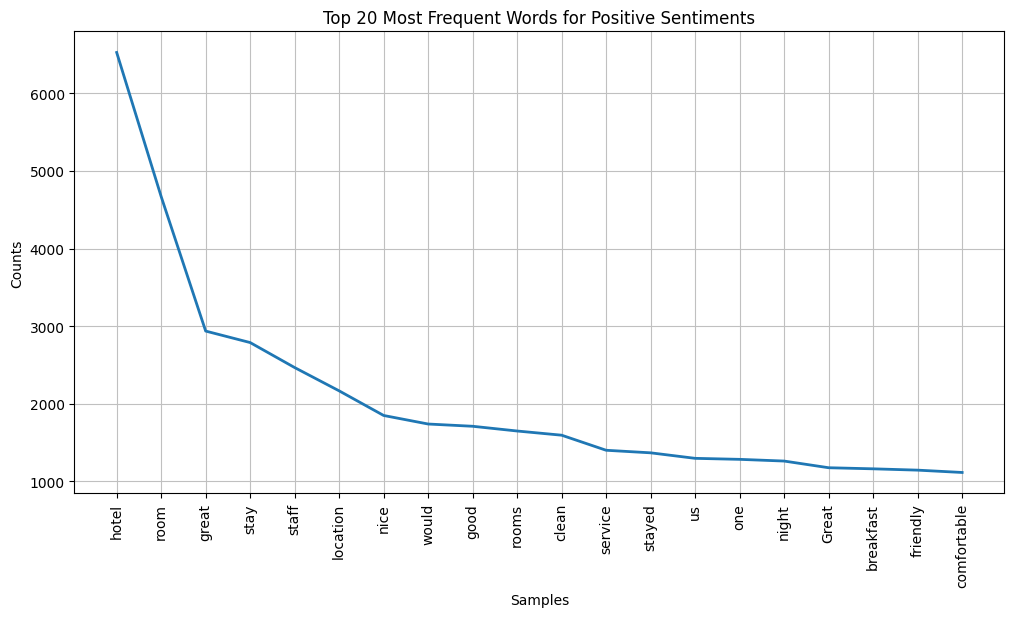

In [ ]:
# Word frequencies for a positive sentiment
positive_frequencies = get_word_frequencies(1)

# Plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.title('Top 20 Most Frequent Words for Positive Sentiments')

# Reflect the top 20 words
positive_frequencies.plot(20, cumulative=False)
plt.show()

#### Word frequency for negative sentiment

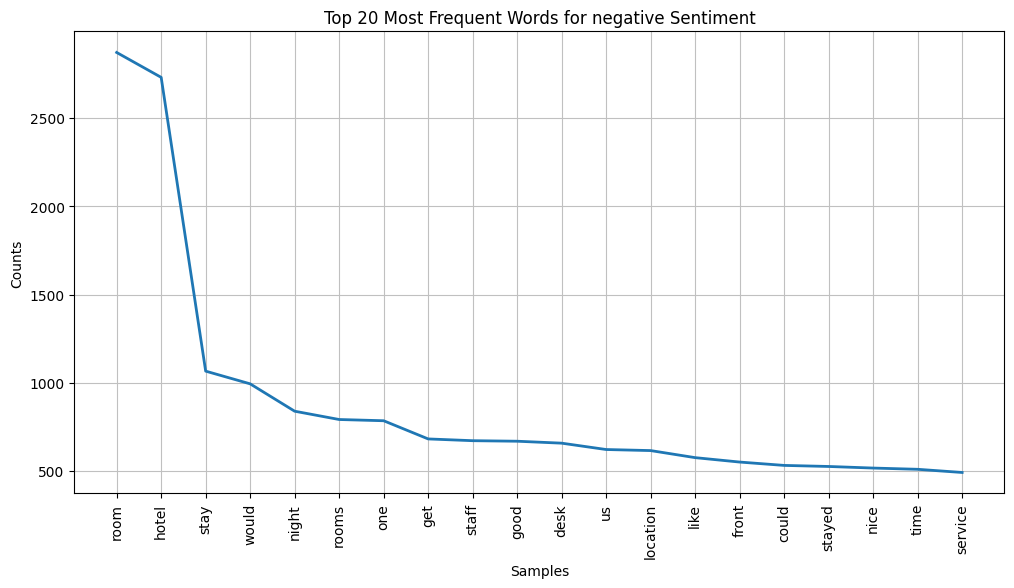

In [ ]:
# Word frequencies for a negative sentiment
negative_frequencies = get_word_frequencies(0)

# Plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.title('Top 20 Most Frequent Words for negative Sentiment')

# Reflect the top 20 words
negative_frequencies.plot(20, cumulative=False)
plt.show()

Overlaping of certain words in positive and negative sentiments: room, hotel, nice, staff, location, service.

#### N-grams sequence of words
This helps in understanding context and common phrases associated with each sentiment.

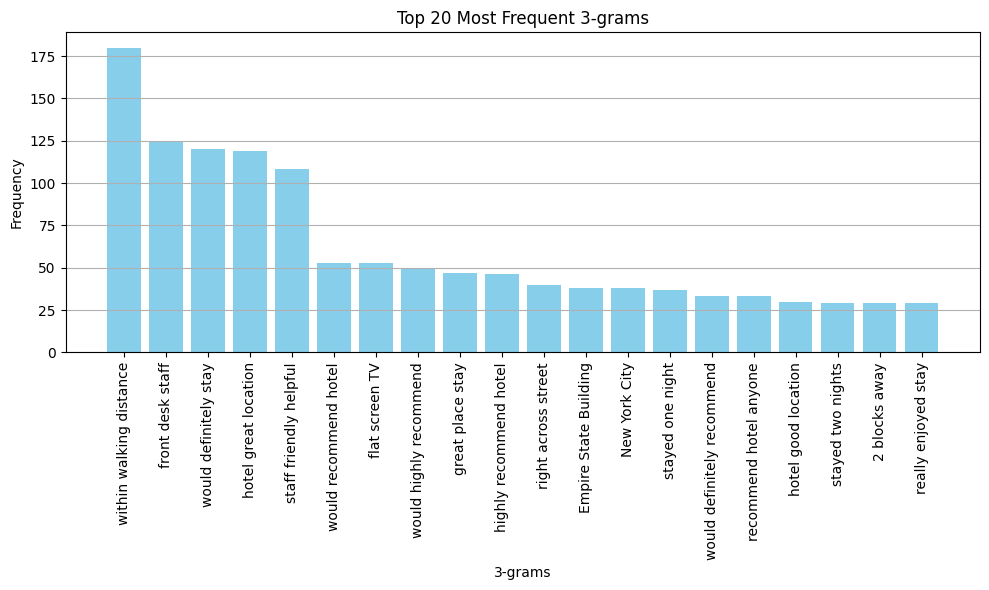

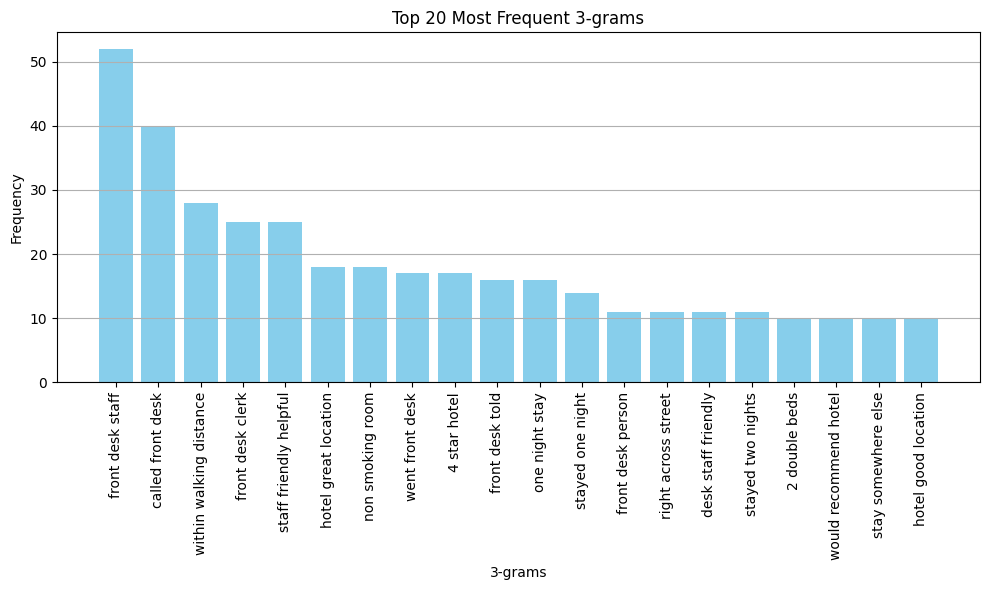

In [ ]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return [' '.join(gram) for gram in ngrams(tokens, n)]

# Function to plot n-grams
def plot_ngrams(ngrams_list, n, top_n=20):
    # Count the occurrences of each n-gram
    ngrams_count = Counter(ngrams_list)

    # Get the most common n-grams
    most_common_ngrams = ngrams_count.most_common(top_n)

    # Unpack the n-grams and their frequencies
    labels, values = zip(*most_common_ngrams)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(labels)), values, color='skyblue')
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent {n}-grams')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def get_tokens_for_sentiment(sentiment):
  stop_words = set(stopwords.words('english'))
  # Filter the DataFrame by sentiment and tokenize
  filtered_texts = sampled_development[sampled_development['overall_rating'] == sentiment]['text_tokenize']
  # Flatten the list of lists and remove stopwords
  tokens = [word for sublist in filtered_texts for word in sublist if word.lower() not in stop_words]
  return tokens

# Get tokens for positive and negative sentiments
positive_tokens = get_tokens_for_sentiment(1)  # 1 represents positive sentiment
negative_tokens = get_tokens_for_sentiment(0)  # 0 represents negative sentiment

# Generate 3-grams for both sentiments
positive_ngrams = generate_ngrams(positive_tokens, 3)
negative_ngrams = generate_ngrams(negative_tokens, 3)

# Plot the top 20 most frequent 3-grams for both
plot_ngrams(positive_ngrams, 3, top_n=20)
plot_ngrams(negative_ngrams, 3, top_n=20)



Overlaping of certain phrases in positive and negative sentiments.

#### Analyze Coefficients for Predictive Power

This helps understanding which words influence sentiment predictions.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

sampled_development['text_joined'] = sampled_development['text_tokenize'].apply(' '.join)

# Text preprocessing and TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(sampled_development['text_joined'])
y = sampled_development['overall_rating']

# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Analyzing coefficients
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()

print("Strongest predictive words for Negative sentiment:", feature_names[sorted_coef_index[:10]])
print("Strongest predictive words for Positive sentiment:", feature_names[sorted_coef_index[:-11:-1]])
print("Least predictive words:", feature_names[sorted_coef_index[len(sorted_coef_index)//2-5:len(sorted_coef_index)//2+5]])

Strongest predictive words for Negative sentiment: ['bad' 'ok' 'dirty' 'average' 'told' 'worst' 'rude' 'terrible' 'room'
 'dated']
Strongest predictive words for Positive sentiment: ['great' 'excellent' 'wonderful' 'comfortable' 'perfect' 'nice' 'loved'
 'amazing' 'helpful' 'enjoyed']
Least predictive words: ['authored' 'leches' 'hare' 'concierage' 'procuring' 'engraving' 'seers'
 'zoos' 'accees' 'dumps']


#### EDA takeways



*   The class distribution is significantly imbalanced
*   There are no extremely short texts that require special handling.
*   Unique words are usually misspelled or include an extra character.
*   Overlapping words and phrases in positive and negative sentiments.
*   Strongest predictive words for Negative sentiment: ['bad' 'ok' 'dirty' 'average' 'told' 'worst' 'rude' 'terrible' 'room'
 'dated']
*   Strongest predictive words for Positive sentiment: ['great' 'excellent' 'wonderful' 'comfortable' 'perfect' 'nice' 'loved'
 'amazing' 'helpful' 'enjoyed']
*   Least predictive words: ['authored' 'leches' 'hare' 'concierage' 'procuring' 'engraving' 'seers'
 'zoos' 'accees' 'dumps']







### 3. Preprocessing

In [ ]:
# Convert tokens to text. To create a new column text_joined to perform further experiments with.
X_development['text_joined'] = X_development['text_tokenize'].apply(' '.join)

In [ ]:
# Get train and text sets from X_development and y_development to perform futher experiments
from sklearn.model_selection import train_test_split
X_dev_train, X_dev_test, y_dev_train, y_dev_test = train_test_split(X_development['text_joined'], y_development, test_size=0.4, random_state=42, stratify=y_development)
# stratify keeps the same propotion of classes is in train and test sets.
# random_state ensures the reproducibility of the experiment's results
# by providing a seed value to the random number generator

#### 3.1 Handling Imbalanced Class Distribution

In [ ]:
# Join X_dev_train and y_dev_train to upsample minority class
df_sample =pd.DataFrame(X_dev_train)
df_sample['sentiment'] =pd.DataFrame( y_dev_train)

In [ ]:
# Split dataset by class
df_majority = df_sample[df_sample['sentiment'] == 1]
df_minority = df_sample[df_sample['sentiment'] == 0]

In [ ]:
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True, #to upsample
                                 n_samples=len(df_majority), # make minority class same length as majority class
                                 random_state=123)

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the resulting dataset to avoid any ordering bias
df_upsampled = df_upsampled.sample(frac=1, random_state=123).reset_index(drop=True)

# Display new class counts to ensure they are balanced
print(df_upsampled['sentiment'].value_counts())

1    4375
0    4375
Name: sentiment, dtype: int64


In [ ]:
# Get X and y from df_upsampled
y_dev_upsampled=df_upsampled['sentiment']
X_dev_upsampled=df_upsampled['text_joined']

In EDA, we noticed overlap in words and phrases across positive and negative sentiments. Advanced techniques like Word Embeddings (Word2Vec, GloVe) and BERT could differentiate based on context but are computationally intensive. A practical alternative is using TF-IDF (Term Frequency-Inverse Document Frequency).

In [ ]:
# Transforming text into a format that machine learning algorithms can work with
from sklearn.feature_extraction.text import TfidfVectorizer
# Apply vectorizer to train and test
vectorizer_dev = TfidfVectorizer()
X_dev_train_vec= vectorizer_dev.fit_transform(X_dev_upsampled)
X_dev_test_vec= vectorizer_dev.transform(X_dev_test)

#### 3.2. Selecting supervised method for sentiment classification

We're evaluating Multinomial Naive Bayes, SVM, and Random Forest for sentiment analysis, using the weighted F1 score to measure the model performance.

##### 3.2.1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# Multinomial Naive Bayes classifier
nb = MultinomialNB()

model_nb=nb.fit(X_dev_train_vec, y_dev_upsampled)

# Make predictions
prediction_nb= model_nb.predict(X_dev_test_vec)

print(f"F1_score: {f1_score(y_dev_test, prediction_nb ,average='weighted'):.3f}")


F1_score: 0.862


##### 3.2.. SVM

In [ ]:
from sklearn.svm import SVC

# SVM classifier
svm = SVC(random_state=42)

model_svm=svm.fit(X_dev_train_vec, y_dev_upsampled)

# Make predictions
prediction_svm= model_svm.predict(X_dev_test_vec)

print(f"F1_score: {f1_score(y_dev_test, prediction_svm ,average='weighted'):.3f}")

F1_score: 0.889


##### 3.2.3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

model_rf=rf.fit(X_dev_train_vec, y_dev_upsampled)

# Make predictions
prediction_rf= model_rf.predict(X_dev_test_vec)

print(f"F1_score: {f1_score(y_dev_test, prediction_rf ,average='weighted'):.3f}")

F1_score: 0.833


##### 3.2.4 Justify selection

- All models were assessed using the weighted F1 score. Positive and negative sentiments are equally important in sentiment analysis. Accuracy alone is insufficient because we are not solely interested in achieving a good performance for positive setiment. F1 score ensures that both precision and recall are considered, offering a more balanced view of the performance across both sentiments.

- We will conduct further experiments using SVC, as this model outperformed the other two by achieving the highest F1 score among them. This indicates that the model had the lowest number of misclassified sentiments among the other two options. Additionally, SVC is frequently used for sentiment analysis.



In [ ]:
from tabulate import tabulate

# Data
table = [['Naive Bayes', 0.862], ['SVM', 0.889],['Random Forest', 0.833]]

# Headers
headers = ['Model', 'F1_score']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+---------------+------------+
| Model         |   F1_score |
+===============+============+
| Naive Bayes   |      0.862 |
+---------------+------------+
| SVM           |      0.889 |
+---------------+------------+
| Random Forest |      0.833 |
+---------------+------------+


#### 3.3 Prepare the data before further experiments

After applying text processing techniques separately (lemmatization, conversion to lowercase, and removal of stop words), we apply a function to upsample the minority class and transform the text into a format compatible with machine learning algorithms. For this reason, we are creating the function `prepare_data` to make the process more efficient.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def prepare_data(X,y):
  # Get train and text sets from X_development and y_development
  X_dev_train, X_dev_test, y_dev_train, y_dev_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

  # Upsample
  df_sample =pd.DataFrame(X_dev_train)
  df_sample['sentiment'] =pd.DataFrame(y_dev_train)

  # Separate the majority and minority classes
  df_majority = df_sample[df_sample['sentiment'] == 1]
  df_minority = df_sample[df_sample['sentiment'] == 0]

  # Upsample minority class
  from sklearn.utils import resample
  df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled])

  # Shuffle the resulting dataset to avoid any ordering bias
  df_upsampled = df_upsampled.sample(frac=1, random_state=123).reset_index(drop=True)

  y_dev_upsampled=df_upsampled['sentiment']
  X_dev_upsampled=df_upsampled[df_upsampled.columns[0]]

  # Transforming text into a format that machine learning algorithms can work with
  vectorizer_dev = TfidfVectorizer()
  X_dev_train_vec= vectorizer_dev.fit_transform(X_dev_upsampled)
  X_dev_test_vec= vectorizer_dev.transform(X_dev_test)

  return X_dev_train_vec, X_dev_test_vec, y_dev_upsampled, y_dev_test

##### 3.3.1 Stop-word removal

In [ ]:
# text processing techniques:stop-word removal
import string
from nltk.corpus import stopwords

nltk.download('stopwords')

def stopword_remove(text):

    # Remove stopwords and punctuation
    stop_words = stopwords.words("english") + list(string.punctuation)
    tokens = [token for token in text if token not in stop_words]
    text1 = " ".join(tokens)

    # Return the cleaned text
    return text1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply function to remove stop words
X_development["stopword_remove"] = X_development["text_tokenize"].apply(stopword_remove)

In [ ]:
# Apply function prepare_data to preparae data for SVC
X_dev_train_1, X_dev_test_1, y_dev_train_1, y_dev_test_1=prepare_data(X_development["stopword_remove"],y_development)

In [ ]:
# Assess the text processing techniques
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Initialize svc
svm_1 = SVC(random_state=42)

# Define the scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 10-fold cross-validation and compute the F1 score
f1_scores_1 = cross_val_score(svm_1, X_dev_train_1, y_dev_train_1, cv=10, scoring=f1_scorer)

print(f"Average F1 Score (Weighted) from 10-Fold Cross-Validation: {f1_scores_1.mean():.3f}")


Average F1 Score (Weighted) from 10-Fold Cross-Validation: 0.966


##### 3.3.2. Lemmatisation

In [ ]:
# text processing techniques: lemmatisation
import string
nltk.download('punkt')

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def lematize_text(text):
  # Lemmatize the tokens
  text1 = " ".join(text)
  doc = nlp(text1)
  tokens = [token.lemma_ for token in doc]


  # Return the cleaned text
  return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Apply function to lematize
X_development["lematize_text"] = X_development["text_tokenize"].apply(lematize_text)

In [ ]:
# Apply function prepare_data to preparae data for SVC
X_dev_train_2, X_dev_test_2, y_dev_train_2, y_dev_test_2=prepare_data(X_development["lematize_text"],y_development)

In [ ]:
# Assess the text processing techniques
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Assuming X_dev_train_4 and y_dev_train_4 are your features and labels respectively
svm_2 = SVC(random_state=42)

# Perform 10-fold cross-validation and compute the F1 score
f1_scores_2 = cross_val_score(svm_2, X_dev_train_2, y_dev_train_2, cv=10, scoring=f1_scorer)

print(f"Average F1 Score (Weighted) from 10-Fold Cross-Validation: {f1_scores_2.mean():.3f}")


Average F1 Score (Weighted) from 10-Fold Cross-Validation: 0.958


##### 3.3.3. Lowercasing

In [ ]:
# text processing techniques lowercasing
import string
def lower_case(text):
  cleaned_text = [word.lower() for word in text]
  return " ".join(cleaned_text)


In [ ]:
# Apply function to lower case
X_development["lower_case"] = X_development["text_tokenize"].apply(lower_case)

In [ ]:
# Apply function prepare_data to preparae data for SVC
X_dev_train_3, X_dev_test_3, y_dev_train_3, y_dev_test_3=prepare_data(X_development["lower_case"],y_development)

In [ ]:
# Assess the text processing techniques
svm_3 = SVC(random_state=42)

# Perform 10-fold cross-validation and compute the F1 score
f1_scores_3 = cross_val_score(svm_3, X_dev_train_3, y_dev_train_3, cv=10, scoring=f1_scorer)

print(f"Average F1 Score (Weighted) from 10-Fold Cross-Validation: {f1_scores_3.mean():.3f}")

Average F1 Score (Weighted) from 10-Fold Cross-Validation: 0.960


#### 3.4. Show best results

The best text processing technique is Stop-Word removal. Removing these words reduces the feature space, making algorithms faster. SVC can focus on the words that carry significant meaning and contribute more to the context of the text.

In [ ]:
from tabulate import tabulate
# Data
table = [['Stop-words removal', 0.966], ['Lemmatisation', 0.958], ['lowercasing', 0.960]]

# Headers
headers = ['Text Processing Technique', 'Average F1 Score']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+-----------------------------+--------------------+
| Text Processing Technique   |   Average F1 Score |
+=============================+====================+
| Stop-words removal          |              0.966 |
+-----------------------------+--------------------+
| Lemmatisation               |              0.958 |
+-----------------------------+--------------------+
| lowercasing                 |              0.96  |
+-----------------------------+--------------------+


#### 3.5. scaling and transformation

In [ ]:
# Initialize the scaler. It will be applied in the next experiment.
from sklearn.preprocessing import StandardScaler

scaler_svm = StandardScaler(with_mean=False) # Set with_mean=False for sparse matrices


### 4. Sentiment classification using VADER lexicon and method

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Defining a function to get the sentiment category
def get_sentiment_category(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score["compound"] > 0:
        return 1
    else:
        return 0


We are going to use X_development["stopword_remove"] as this task required that VADER has to be applied the text preprocess in 3.3

In [ ]:
# Applying the function to the dataframe
X_development["Sentiment_VADER_stopwords"] = X_development["stopword_remove"].apply(get_sentiment_category)

# Get f1-score
f1_score = f1_score(y_development , X_development["Sentiment_VADER_stopwords"])
print(f1_score)

0.8732021423843052


In [ ]:
from tabulate import tabulate

# Data
table = [['Stop-words removal', 0.966], ['Vader', 0.873]]

# Headers
headers = ['Technique', 'Value']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+--------------------+---------+
| Technique          |   Value |
+====================+=========+
| Stop-words removal |   0.966 |
+--------------------+---------+
| Vader              |   0.873 |
+--------------------+---------+


While stop-word removal is a common preprocessing step to reduce dimensionality and focus on meaningful words, its combination with Vader for sentiment analysis in this case appears to have been counterproductive, reducing the overall effectiveness of sentiment classification.

### 5. Combining VADER with the best classifier

The procedure we followed is based on the workflow presented in Sentiment Analysis for TikTok Review Using VADER Sentiment and SVM Model, 2023 [1].



In [ ]:
# Using funtion defined in 3.3 to prepare data
X_dev_train_5, X_dev_test_5, y_dev_train_5, y_dev_test_5=prepare_data(X_development["lower_case"],X_development["Sentiment_VADER_stopwords"])

In [ ]:
# Apply standard scaler
X_dev_train_scaler=scaler_svm.fit_transform(X_dev_train_5)
X_dev_test_scaler=scaler_svm.transform(X_dev_test_5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM classifier
svm_5 = SVC(random_state=42)

param_grid_svm={}

# Initialize GridSearchCV for SVM
grid_search_svm_5 = GridSearchCV(svm_5, param_grid_svm, cv=10, scoring='f1_weighted', return_train_score=True)

# Train the model
grid_search_svm_5.fit(X_dev_train_scaler,y_dev_train_5)

# Metrics
f1_val_svm = grid_search_svm_5.cv_results_['mean_test_score']
f1_train_svm = grid_search_svm_5.cv_results_['mean_train_score']

# Get the best estimator for SVM
best_svm_model = grid_search_svm_5.best_estimator_

print(f"Mean cross-validated test: {np.mean(f1_val_svm):.3f}")
print(f"Mean cross-validated train : {np.mean(f1_train_svm):.3f}")

Mean cross-validated test accuracy: 0.996
Mean cross-validated train accuracy: 0.999


In [ ]:
print(f"Mean cross-validated train and validation F1_score: {(np.mean(f1_train_svm)+np.mean(f1_val_svm))/2:.3f}")

Mean cross-validated train and validation F1_score: 0.942


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Get precision, recall, f1-score
y_pred_svm=best_svm_model.predict(X_dev_test_scaler)
report = classification_report(y_dev_test_5, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.14      0.21       337
           1       0.94      0.99      0.96      4663

    accuracy                           0.93      5000
   macro avg       0.70      0.56      0.59      5000
weighted avg       0.91      0.93      0.91      5000



To compare results with point 3.4 and 4, we take as reference the average F1_score ot the train and validation set. The reason is that methods in point 3.4 and 4 only take into account cross-validation result.

In [ ]:
from tabulate import tabulate

# Data
table = [['Stop-words removal', 0.966], ['Vader', 0.873],['Combining VADER + the best classifier', 0.993]]

# Headers
headers = ['Technique', 'Value']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+---------------------------------------+---------+
| Technique                             |   Value |
+=======================================+=========+
| Stop-words removal                    |   0.966 |
+---------------------------------------+---------+
| Vader                                 |   0.873 |
+---------------------------------------+---------+
| Combining VADER + the best classifier |   0.993 |
+---------------------------------------+---------+


The result from Combining VADER with the best classifier improved compared to point (using purely Vader). The result in combining Vader and the best classifier is better than only best classifier, considering stop-word removal.

### 6. Trainig and testing the final method

#### Preprocessing

In [ ]:
# Convert tokens to text. To create a new column text_joined
X_train['text_joined'] = X_train['text_tokenize'].apply(' '.join)

In [ ]:
# Apply Stop-word removal using function defined in 3.3.1
X_train["stopword_remove"] = X_train["text_tokenize"].apply(stopword_remove)

In [ ]:
#Get y_train using function defined in 4
X_train["Sentiment_VADER"] =X_train["stopword_remove"].apply(get_sentiment_category)

In [ ]:
# Drop columns that will not be used
X_train.drop(columns=['text_tokenize','text_joined'], inplace=True)

In [ ]:
#up sample minority class
# Separate the majority and minority classes
df_train_majority = X_train[X_train['Sentiment_VADER'] == 1]
df_train_minority = X_train[X_train['Sentiment_VADER'] == 0]

dftrain_minority_upsampled = resample(df_train_minority,
                                 replace=True,
                                 n_samples=len(df_train_majority),
                                 random_state=123)

# Combine majority class with upsampled minority class
dftrain_upsampled = pd.concat([df_train_majority, dftrain_minority_upsampled])

# Shuffle the resulting dataset to avoid any ordering bias
dftrain_upsampled = dftrain_upsampled.sample(frac=1, random_state=123).reset_index(drop=True)

# Display new class counts to ensure they are balanced
print(dftrain_upsampled['Sentiment_VADER'].value_counts())


0    9389
1    9389
Name: Sentiment_VADER, dtype: int64


In [ ]:
#Rename X_train
X=X_train["stopword_remove"]

In [ ]:
# Rename y_train_new
y=X_train["Sentiment_VADER"]

In [ ]:
# Transforming text into a format that machine learning algorithms can work with
vectorizer_last = TfidfVectorizer()
X_train = vectorizer_last.fit_transform(X)

In [ ]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False) # Set with_mean=False for sparse matrices

# Fit on the TF-IDF data and transform it
X_standardized = scaler.fit_transform(X_train)


#### Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM classifier
svm_final= SVC(random_state=42)

param_grid_svm={}

# Initialize GridSearchCV for SVM
grid_search_svm= GridSearchCV(svm_final, param_grid_svm, cv=10, scoring='f1_weighted', return_train_score=True)

# Train the model
grid_search_svm.fit(X_standardized,y)

# Metrics
f1_val_svm = grid_search_svm.cv_results_['mean_test_score']
f1_train_svm = grid_search_svm.cv_results_['mean_train_score']

# Get the best estimator for SVM
best_svm_model = grid_search_svm.best_estimator_

print(f"Mean cross-validated test {np.mean(f1_val_svm):.3f}")
print(f"Mean cross-validated train : {np.mean(f1_train_svm):.3f}")

Mean cross-validated test accuracy: 0.909
Mean cross-validated train accuracy: 0.976


In [ ]:
print(f"Mean cross-validated average train and test of F1_score: {(np.mean(f1_train_svm)+np.mean(f1_val_svm))/2:.3f}")

Mean cross-validated train : 0.942


#### Testing

In [ ]:
# Convert tokens to text. To create a new column text_joined
X_test['text_joined'] = X_test['text_tokenize'].apply(' '.join)

In [ ]:
# Apply Stop-word removal using function defined in 3.3.1
X_test["stopword_remove"] = X_test["text_tokenize"].apply(stopword_remove)

In [ ]:
# Get y_test using function defined in 4
X_test["Sentiment_VADER"] =X_test["stopword_remove"].apply(get_sentiment_category)

In [ ]:
# Drop columns that will not be used
X_test.drop(columns=['text_tokenize', 'text_joined'], inplace=True)

In [ ]:
X_test

,stopword_remove,Sentiment_VADER
20000,Great Stay Comfortable Room Very Few Downsides...,1
20001,Nice Place It really nice hotel 2 BR 2 Bath Su...,1
20002,Tip top Having New York number occasions I fai...,1
20003,Great Location rough sleep For price location ...,1
20004,Compact cool Midtown hotel Having read mainly ...,1
...,...,...
29995,Felt right home I stayed many downtown Chicago...,1
29996,Days Inn Chicago 101212 It always pleasant sta...,1
29997,Upgrades Needed We recently stayed girls weeke...,0
29998,perfect bargain city hotel I made reservation ...,1


In [ ]:
# Get X_test and y_test
df_test=X_test.copy()
X_test=df_test["stopword_remove"]
y_test=df_test["Sentiment_VADER"]

In [ ]:
# Transforming text into a format that machine learning algorithms can work with
X_test=vectorizer_last.transform(X_test)

In [ ]:
# Apply Standard scaler
X_test_st=scaler.transform(X_test)

In [ ]:
# Predict
prediction=best_svm_model.predict(X_test_st)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Get precision, recall, f1-score
report = classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       676
           1       0.93      1.00      0.97      9324

    accuracy                           0.93     10000
   macro avg       0.97      0.50      0.48     10000
weighted avg       0.94      0.93      0.90     10000



How these results compare with the best results from point 5? Why there are differences, if any?



The results from point 6 show a slight decrease in performance compared to point 5, both for the training/validation and test sets.

**For training and validation:**
- The F1 score at point 5 is 0.993, which slightly decreases to 0.942 at point 6.

**For testing:**
- The F1 score at point 5 is 0.91, which decreases to 0.9 at point 6.
The differences suggest that the model's performance in point 6 was slightly less effective at generalizing from the training data to unseen data. It's also possible that the model at point 6 was slightly overfitted to the training data, resulting in a lower F1 score when predicting on the validation and test sets


In [ ]:
from tabulate import tabulate

# Data
table = [['F1_score for train and validation average in point 6', 0.942], ['F1_score for train and validation average in point 5', 0.993]]

# Headers
headers = ['SVC+Vader', 'Value']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+------------------------------------------------------+---------+
| SVC+Vader                                            |   Value |
+======================================================+=========+
| F1_score for train and validation average in point 6 |   0.942 |
+------------------------------------------------------+---------+
| F1_score for train and validation average in point 5 |   0.993 |
+------------------------------------------------------+---------+


In [ ]:
from tabulate import tabulate

# Data
table = [['F1_score for test in point 6', 0.90], ['F1_score for test in point 5', 0.91]]

# Headers
headers = ['SVC+Vader', 'Value']

# Display the table
print(tabulate(table, headers, tablefmt="grid"))

+------------------------------+---------+
| SVC+Vader                    |   Value |
+==============================+=========+
| F1_score for test in point 6 |    0.9  |
+------------------------------+---------+
| F1_score for test in point 5 |    0.91 |
+------------------------------+---------+


### 7. Reviews aspect prediction

This approach is based on "Multiclass Sentiment Prediction of Airport Service Online Reviews Using Aspect-Based Sentimental Analysis and Machine Learning [2].

The described approach is a structured method for extracting and analyzing sentiment from product or service reviews, focusing on various aspects. Below is a brief workflow of the process:
1. **Data Collection**: Gathering of review data, which provides the raw material for sentiment analysis.
2. **Preprocessing**: Prepare the data for analysis, some preprocessing steps are undertaken:
   - Stopword Removal
   - POS Tagging: Words are tagged with their parts of speech to understand their role in sentences.
   - Adjective Removal: Non-aspect-specific adjectives are eliminated, sharpening the focus on pertinent descriptors. Prior to this step, aspects and aspect-specific adjectives are defined.
3. **Aspect Classification**: Review sentences are sorted into categories based on predefined aspects like cleanliness, location, amenities, and more.
4. **Sentiment Analysis**: Each aspect undergoes sentiment analysis to assess whether the related comments are positive, negative, or neutral.
5. **Topic Modeling**: In parallel, topic modeling techniques are applied to reveal any latent topics across the reviews, providing insights into themes not predefined in the aspect categories.
6. **Aspect Representation**: Sentences that reflect the sentiment toward each aspect are chosen based on the sentiment classification.
7. **Opinion Scoring**: Scores are assigned to each aspect reflecting the intensity and polarity of the sentiments expressed.
8. **Sentence Curation**: The sentences that most effectively convey sentiment for each aspect are compiled for potential use.
9. **Output Generation**: The process finishes in the delivery of two outputs: quantified opinion scores by aspect and a selection of sentences for each aspect, offering a comprehensive sentiment summary.

### 8. References

[1] M. Isnan, G. N. Elwirehardja, and B. Pardamean, "Sentiment Analysis for TikTok Review Using VADER Sentiment and SVM Model," in *Procedia Computer Science*, vol. 227, pp. 168–175, 2023.#

[2] M. S. M. Alanazi, J. Li, and K. W. Jenkins, "Multiclass Sentiment Prediction of Airport Service Online Reviews Using Aspect-Based Sentimental Analysis and Machine Learning," Mathematics (Basel), vol. 12, no. 5, pp. 781-, 2024.